In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load the two images
img1 = cv2.imread(r'C:\Users\MANAV MAHENDRU\Downloads\apple_top.jpg')
img2 = cv2.imread(r'C:\Users\MANAV MAHENDRU\Downloads\apple_side.jpg')

In [2]:
img1.shape

(4624, 3468, 3)

In [3]:
img2.shape

(4624, 3468, 3)

In [4]:
gray_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

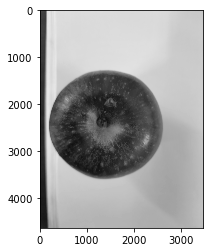

In [5]:
plt.imshow(gray_img1,'gray')

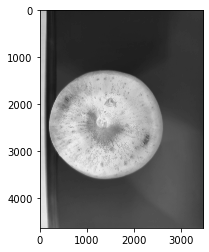

In [6]:
apple_top_inverted=cv2.bitwise_not(gray_img1)
plt.imshow(apple_top_inverted,'gray')

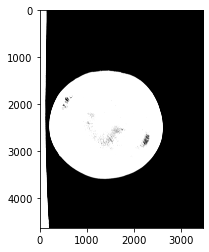

In [11]:
_, binary1 = cv2.threshold(apple_top_inverted, 115, 255, cv2.THRESH_BINARY)

# Display the result 
plt.imshow(binary1,'gray')

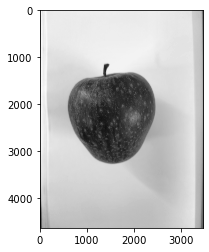

In [12]:
plt.imshow(gray_img2,'gray')

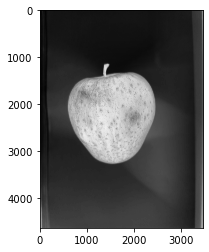

In [13]:
apple_side_inverted=cv2.bitwise_not(gray_img2)
plt.imshow(apple_side_inverted,'gray')

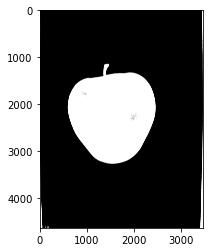

In [16]:
_, binary2 = cv2.threshold(apple_side_inverted, 110, 255, cv2.THRESH_BINARY)

# Display the result 
plt.imshow(binary2,'gray')

In [28]:
white_pixels_top=np.where(binary1==255)

In [29]:
white_pixels_top

(array([   0,    0,    0, ..., 4623, 4623, 4623], dtype=int64),
 array([  0,   1,   2, ..., 186, 187, 188], dtype=int64))

In [30]:
white_pixels_side=np.where(binary2==255)

In [31]:
white_pixels_side

(array([   0,    0,    0, ..., 4623, 4623, 4623], dtype=int64),
 array([   0,    1,    2, ..., 3465, 3466, 3467], dtype=int64))

In [33]:
height, width = binary1.shape[:2]
print(height,width)

4624 3468


In [34]:
height, width = binary2.shape[:2]
print(height,width)

4624 3468


Text(0.5, 1.0, 'Second')

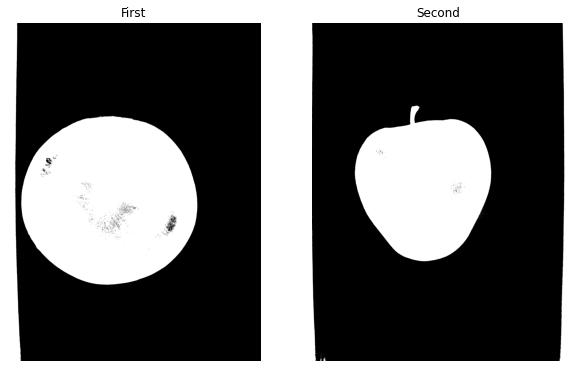

In [41]:
# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 1
columns = 2
  
# reading images
img1 = cv2.imread(r'C:\Users\MANAV MAHENDRU\Downloads\apple_top.jpg')
img2 = cv2.imread(r'C:\Users\MANAV MAHENDRU\Downloads\apple_side.jpg')
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(binary1,'gray')
plt.axis('off')
plt.title("First")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
plt.imshow(binary2,'gray')
plt.axis('off')
plt.title("Second")

In [37]:
volume = 0
for y in range(height):
    for x in range(width):
        # Check if the pixel is white in both images
        if binary1[y,x] == 255 and binary2[y,x]==255:
            # Multiply the pixel values and add to the volume
            volume += binary1[y,x]*binary2[y,x]

print("Volume: ", volume*12*22*8.69/(4624*3468))

C:\Users\MANAVM~1\AppData\Local\Temp/ipykernel_12776/573230550.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
  volume += binary1[y,x]*binary2[y,x]


Volume:  395.75139550232876
